In [1]:
#install twint, nest_asyncio
! pip install -qq twint
! pip install -qq nest_asyncio


     |████████████████████████████████| 263 kB 7.2 MB/s 
     |████████████████████████████████| 385 kB 87.5 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 288 kB 78.5 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 59 kB 8.8 MB/s 
     |████████████████████████████████| 140 kB 82.6 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 


In [2]:
#Installing twint -> better to install with github rather than the 

!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
!pip install aiohttp==3.7.0
!pip install nest_asyncio


Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38871 sha256=c96b4d9a248a3621309409908b99cdc6d16627d64f010d77c3382a6f5c282e05
  Stored in directory: /tmp/pip-ephem-wheel-cache-5apnc175/wheels/f7/3

In [3]:
import pandas as pd

# extract data from twitter 
import twint

##Solve compatibility issues with notebooks and RunTime errors
import nest_asyncio
nest_asyncio.apply()


In [4]:
# import nltk libraries

import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string 



In [5]:
# setting up twint config

c= twint.Config()

# extracting data from twitter

c.Search= "meat"
c.Lang="en"
c.Pandas= True
c.Limit= 10000

twint.run.Search(c)


Streaming output truncated to the last 5000 lines.
1594030074726035456 2022-11-19 18:09:20 +0000 <islamcryptocoin> Ukraine War: 'Horrendous casualties, it's becoming a meat grinder' ##russia ##ukraine ##stop_war ##war  https://t.co/snmiVsebnE
1594030071961899008 2022-11-19 18:09:19 +0000 <Teddylegs61> @Its_Rohit_RK @glennmartin50 @purbrooktony 😂
1594030069214756866 2022-11-19 18:09:18 +0000 <DankIightning> @prodbylukee @KEEMSTAR Meat muncher
1594030064324079616 2022-11-19 18:09:17 +0000 <BrianThrockmor5> @catturd2 Red meat
1594030051246231552 2022-11-19 18:09:14 +0000 <79hfg3n3948rhf0>  https://t.co/LQiajDgoXV
1594030048264261632 2022-11-19 18:09:13 +0000 <Tech_Telly> @meat_millz @_SevenPound Period on the parking, I one hand it w/no camera everytime 😭. I dnt ever need to pull out and try again I get on there the first time...unless it's tight 🤭
1594030041687642113 2022-11-19 18:09:12 +0000 <minsIilac> Will we meat in our dreams
1594030029289435136 2022-11-19 18:09:09 +0000 <Sentient_S

In [6]:
# Saving in dataframe

def columne_names():
  return twint.output.panda.Tweets_df.columns

In [7]:
def twint_to_pd(columns):
  return twint.output.panda.Tweets_df[columns]

In [8]:
data= twint_to_pd(["tweet"])

In [9]:
data.head()

,tweet
0,"Gangneung, South Korea, Shut down illegal dog ..."
1,"@Perry_Stroyka @JamesL1927 Thanks, that made m..."
2,@akua_twum_ Not enough meat if u ask me
3,I can’t tell you how heartwarming the past few...
4,"@kimdros @ada_lluch @elonmusk Actually, that’s..."


In [10]:
 data["tweet"]= data["tweet"].str.replace("[^a-zA-Z0-9]", " ")
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data

,tweet
0,Gangneung South Korea Shut down illegal dog ...
1,Perry Stroyka JamesL1927 Thanks that made m...
2,akua twum Not enough meat if u ask me
3,I can t tell you how heartwarming the past few...
4,kimdros ada lluch elonmusk Actually that s...
...,...
10004,A braai is something you can enjoy with family...
10005,TeukGel03 QUALITY HANU MEAT https t co v...
10006,ZonTrill Damn no dressing Meat Chess pie a...
10007,Marjia43552124 I would love to spread those l...


Preprocessing process (involves 4 steps )
1. Removing punctuation
2. Tokenization
3. Remove stopwords
4. Lemmatize/ stem

In [12]:
# removing short words/ punctuation
data["tweet"]= data["tweet"].apply(lambda x: " ".join ([w for w in x.split() if len (w)>3]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
data

,tweet
0,Gangneung South Korea Shut down illegal meat f...
1,Perry Stroyka JamesL1927 Thanks that made hear...
2,akua twum enough meat
3,tell heartwarming past days have been phone ha...
4,kimdros lluch elonmusk Actually that exactly w...
...,...
10004,braai something enjoy with family friends coll...
10005,TeukGel03 QUALITY HANU MEAT https vKZmFs38n5
10006,ZonTrill Damn dressing Meat Chess squares
10007,Marjia43552124 would love spread those legs ta...


In [14]:
# tokenize the data

def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens
data['tweet']= data['tweet'].apply (lambda x: tokenize(x.lower()))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
nltk.download("stopwords")
stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
# remove stopwords

def remove_stopword(text):
    text_nostopword= [char for char in text if char not in stopwords]
    return text_nostopword

data['tweet']= data['tweet'].apply(lambda x: remove_stopword(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [17]:
data

,tweet
0,"[gangneung, south, korea, shut, illegal, meat,..."
1,"[perry, stroyka, jamesl1927, thanks, made, hea..."
2,"[akua, twum, enough, meat]"
3,"[tell, heartwarming, past, days, phone, stoppe..."
4,"[kimdros, lluch, elonmusk, actually, exactly, ..."
...,...
10004,"[braai, something, enjoy, family, friends, col..."
10005,"[teukgel03, quality, hanu, meat, https, vkzmfs..."
10006,"[zontrill, damn, dressing, meat, chess, squares]"
10007,"[marjia43552124, would, love, spread, legs, ta..."


In [18]:
# Porter Stemmer
ps= nltk.PorterStemmer()

In [19]:
# stemming 

def stem(tweet_no_stopword):
   text = [ps.stem ( word) for word in tweet_no_stopword]
   return text

data["tweet"]= data["tweet"].apply(lambda x: stem(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [20]:
data

,tweet
0,"[gangneung, south, korea, shut, illeg, meat, f..."
1,"[perri, stroyka, jamesl1927, thank, made, hear..."
2,"[akua, twum, enough, meat]"
3,"[tell, heartwarm, past, day, phone, stop, surp..."
4,"[kimdro, lluch, elonmusk, actual, exactli, inc..."
...,...
10004,"[braai, someth, enjoy, famili, friend, colleag..."
10005,"[teukgel03, qualiti, hanu, meat, http, vkzmfs3..."
10006,"[zontril, damn, dress, meat, chess, squar]"
10007,"[marjia43552124, would, love, spread, leg, tas..."


In [21]:
data= pd.DataFrame(data["tweet"])

In [22]:
data

,tweet
0,"[gangneung, south, korea, shut, illeg, meat, f..."
1,"[perri, stroyka, jamesl1927, thank, made, hear..."
2,"[akua, twum, enough, meat]"
3,"[tell, heartwarm, past, day, phone, stop, surp..."
4,"[kimdro, lluch, elonmusk, actual, exactli, inc..."
...,...
10004,"[braai, someth, enjoy, famili, friend, colleag..."
10005,"[teukgel03, qualiti, hanu, meat, http, vkzmfs3..."
10006,"[zontril, damn, dress, meat, chess, squar]"
10007,"[marjia43552124, would, love, spread, leg, tas..."


In [23]:
data_list = data.loc[:,"tweet"].to_list()
len(data_list)

10009

In [24]:
# putting the twitter in flat list
flat_data_list = [item for sublist in data_list for item in sublist]
len(flat_data_list)

102696

In [25]:
data_count= pd.DataFrame(flat_data_list)
data_count= data_count[0].value_counts()

In [26]:
from nltk.probability import FreqDist
freq_count= FreqDist()
for words in data_count:
  freq_count[words] +=1

freq_count

FreqDist({1: 13709, 2: 2312, 3: 1035, 4: 614, 5: 397, 6: 310, 7: 206, 8: 184, 9: 144, 10: 136, ...})

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


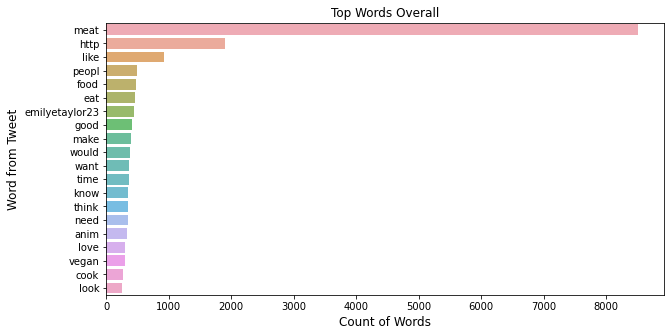

In [28]:
data_count = data_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(data_count.values, data_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()